In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
ecg = pd.read_csv(r'/content/sam_ECG.csv')
# ecg = pd.read_csv(r'/content/sam_ECG.csv', nrows=10000000)

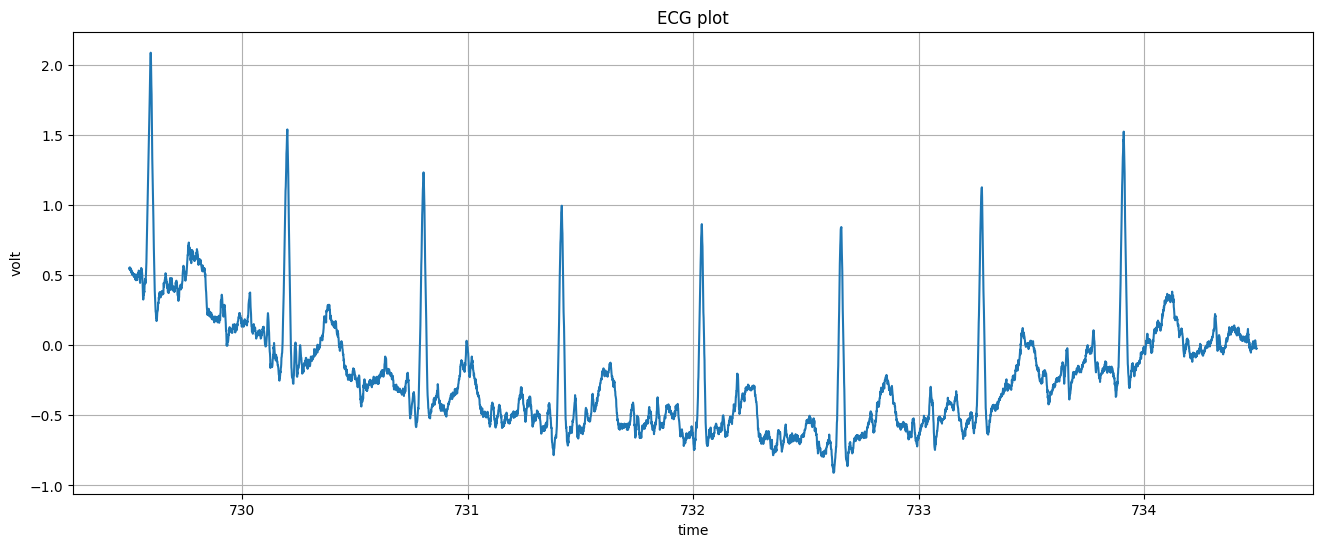

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(ecg['time'][:5000], ecg['ecg'][:5000])
plt.title('ECG plot')
plt.xlabel('time')
plt.ylabel('volt')
plt.grid(True)
plt.show()

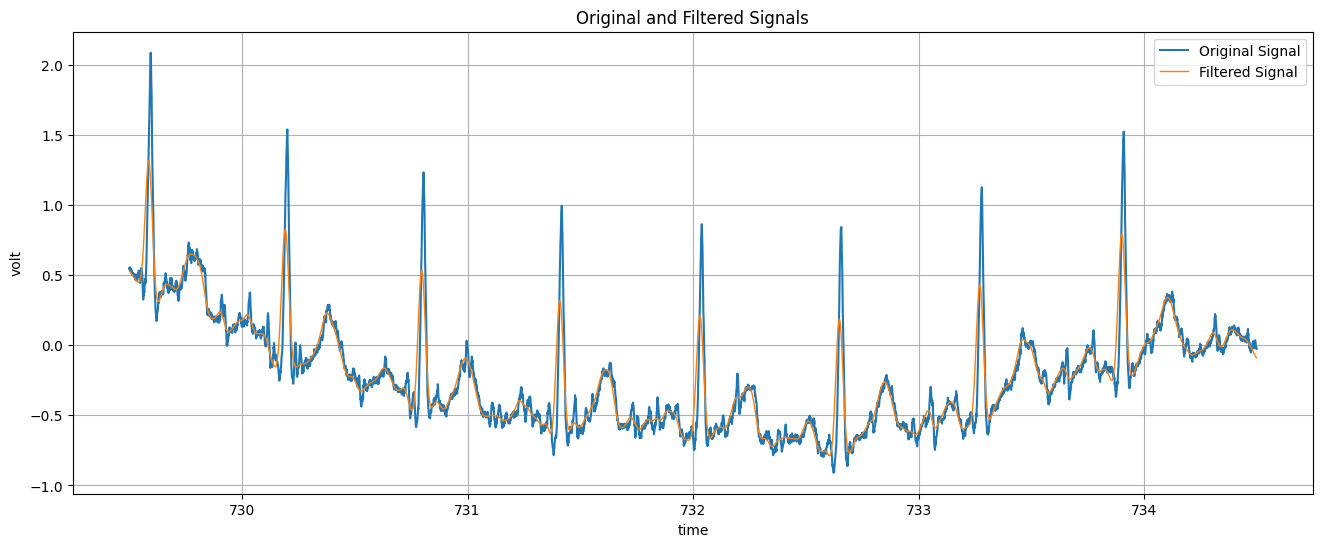

In [ ]:
# Applying butterworth lowpass filter to make the signal smoother and reduce noise

from scipy.signal import butter, filtfilt

time = ecg['time']
signal = ecg['ecg']

dt = time[1] - time[0]  # Assuming uniform sampling interval
fs = 1 / dt
# print(f'Sampling Frequency: {fs} Hz')

def butter_lowpass_filter(data, cutoff, fs, order):
  nyq=0.5*fs
  normal_cutoff = cutoff / nyq
  # Get the filter coefficients
  b, a = butter(order, normal_cutoff, btype='low', analog=False)
  y = filtfilt(b, a, data, axis=0)
  return y

x = butter_lowpass_filter(signal, 16, fs, 2)
# x = np.absolute(x)

# Define a simple moving average function
def simple_moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

# Apply the simple moving average with a window size of 5
window_size = 15
sma_signal = simple_moving_average(x, window_size)

plt.figure(figsize=(16, 6))
plt.plot(time[:5000], signal[:5000], label='Original Signal')
plt.plot(time[:5000], sma_signal[:5000], label='Filtered Signal', linewidth=1)
plt.xlabel('time')
plt.ylabel('volt')
plt.title('Original and Filtered Signals')
plt.legend()
plt.grid()
plt.show()

# print(x)
# print(signal)

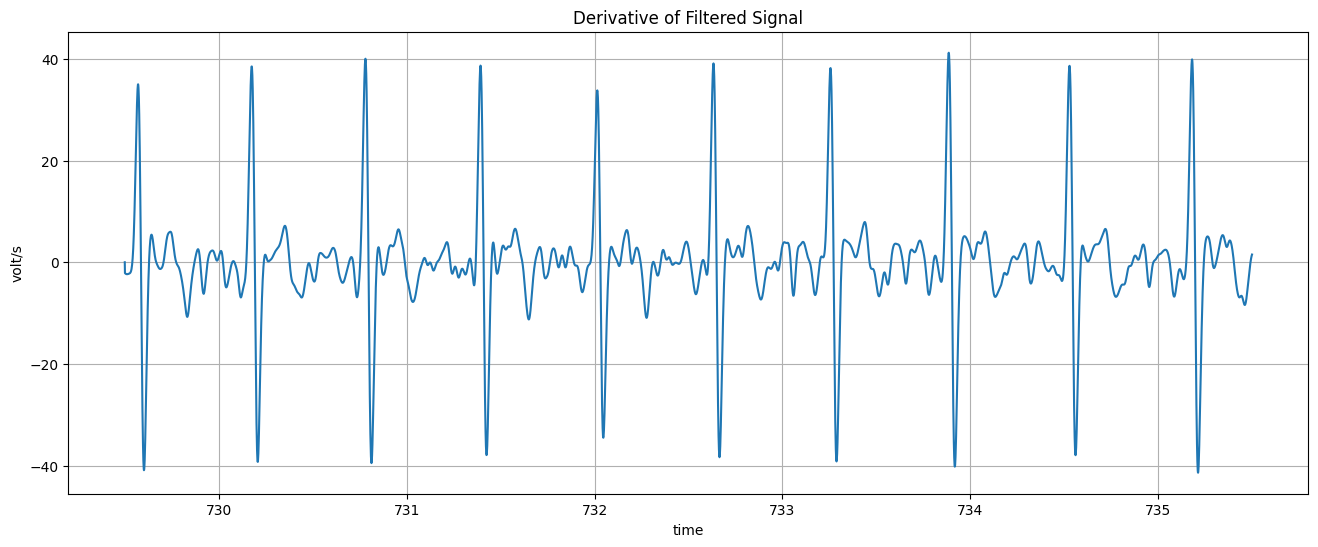

In [ ]:
# prompt: a function to differentiate the sma_signal and plot it using pyplot

import matplotlib.pyplot as plt
import numpy as np
def differentiate(signal):
  derivative = np.zeros_like(signal)
  for i in range(1, len(signal) - 1):
    derivative[i] = (signal[i + 1] - signal[i - 1]) / (2 * dt)
  return derivative

derivative_signal = differentiate(sma_signal)

plt.figure(figsize=(16, 6))
plt.plot(time[:6000], derivative_signal[:6000])
plt.xlabel('time')
plt.ylabel('volt/s')
plt.title('Derivative of Filtered Signal')
plt.grid()
plt.show()


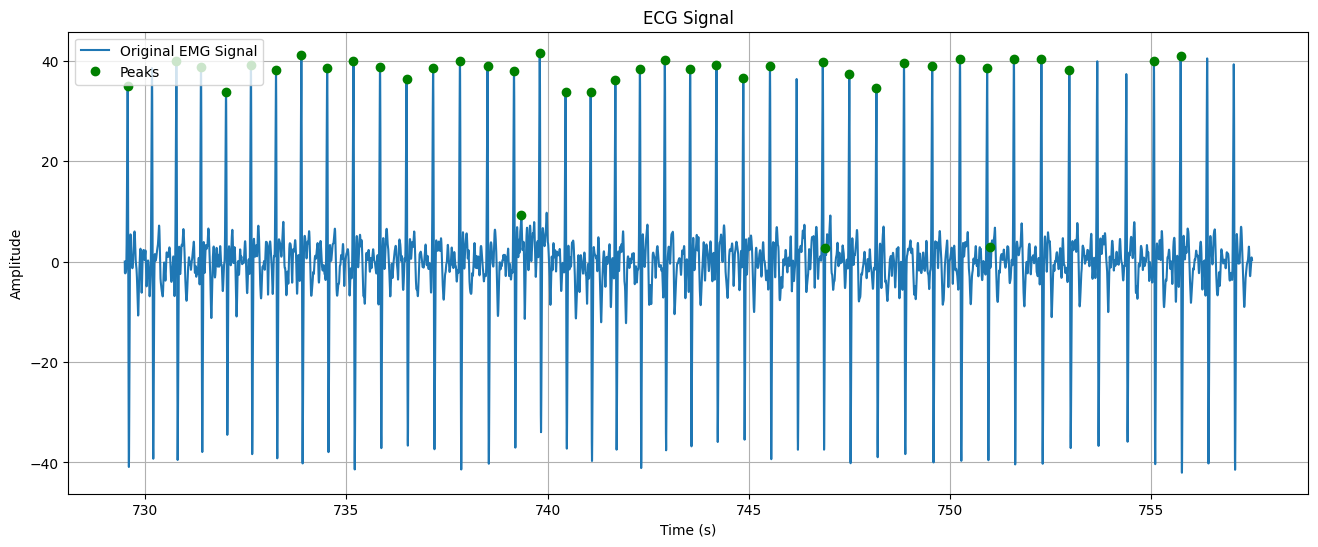

In [ ]:
# Finding the peaks of the signal
from scipy.signal import find_peaks
peaks, _ = find_peaks(derivative_signal, threshold = 0.023)


# peaks = peaks[x[peaks] > 0.22]
# for i in range(len(peaks)):
#   if x[peaks[i]]<=0.8:
#     np.delete(peaks, i)

plt.figure(figsize=(16, 6))
plt.plot(time[:28000], derivative_signal[:28000], label='Original EMG Signal')

plt.plot(time[peaks][:40], derivative_signal[peaks][:40], 'go', label='Peaks')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.legend()
plt.grid(True)
plt.show()

# print(peaks)

In [ ]:
t_btw_peaks=[]

for i in range(len(peaks)-1):
  m = time[peaks[i+1]] - time[peaks[i]]
  t_btw_peaks.append(m)

peak_diff = np.array(t_btw_peaks)

# print(t_btw_peaks)

mean = np.mean(peak_diff)

bpm = 60/mean
print(bpm)
# This is the mean heart rate of the entire recording of the data

83.58468132530317
